In [1]:
import pandas as pd

df = pd.read_csv('Climate_Ready_Boston_Social_Vulnerability.csv')

df = df.groupby('Name').sum()
df['Housing Density'] = df['HU100_RE'] / df['AREA_SQFT'] *100
df['Population Density'] = df['POP100_RE'] / df['AREA_SQFT'] *100
df.head()


,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,Housing Density,Population Density
Name,,,,,,,,,,,,,,,,,
Allston,18,50050001407,4.496899e+06,103.2346,7592,3823,400,173,144,3300,3444,3011,2831.85,7.654467e+05,5922.975082,0.085014,0.168827
Back Bay,597,275277067915,3.409361e+07,782.6818,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5.803907e+06,67191.048486,0.053866,0.083986
Bay Village,360,75075210902,9.390969e+06,215.5870,10850,5076,1122,1249,1711,3929,5640,6008,4292.93,1.598363e+06,10057.148535,0.054052,0.115537
Brighton,1104,350350006124,1.013412e+08,2326.4742,60821,27143,5502,4244,5847,17067,22914,19768,23936.80,1.724984e+07,78759.270776,0.026784,0.060016
Charlestown,821,150150242402,3.768344e+07,865.0927,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6.420148e+06,47678.443687,0.022949,0.043624


In [2]:
df_sum = pd.read_csv('../Merged Data/result.csv')

merged_data = pd.merge(df, df_sum, on='Name', how='inner')
newdf = merged_data[['Name', 'Housing Density', 'Population Density', 'AQI_OZONE', 'AQI_PM10' ,'AQI_PM2.5']]
newdf.head()


,Name,Housing Density,Population Density,AQI_OZONE,AQI_PM10,AQI_PM2.5
0,Allston,0.085014,0.168827,32.302326,14.156,33.431573
1,Back Bay,0.053866,0.083986,32.302326,14.156,33.431573
2,Bay Village,0.054052,0.115537,32.302326,14.156,33.431573
3,Brighton,0.026784,0.060016,32.302326,14.156,33.431573
4,Charlestown,0.022949,0.043624,32.302326,14.156,29.433603


/var/folders/x2/ytnr8xd57_l9xr_fy9b33p_w0000gn/T/ipykernel_89391/2114739570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Total PM'] = newdf['AQI_PM2.5'] + newdf['AQI_PM10']


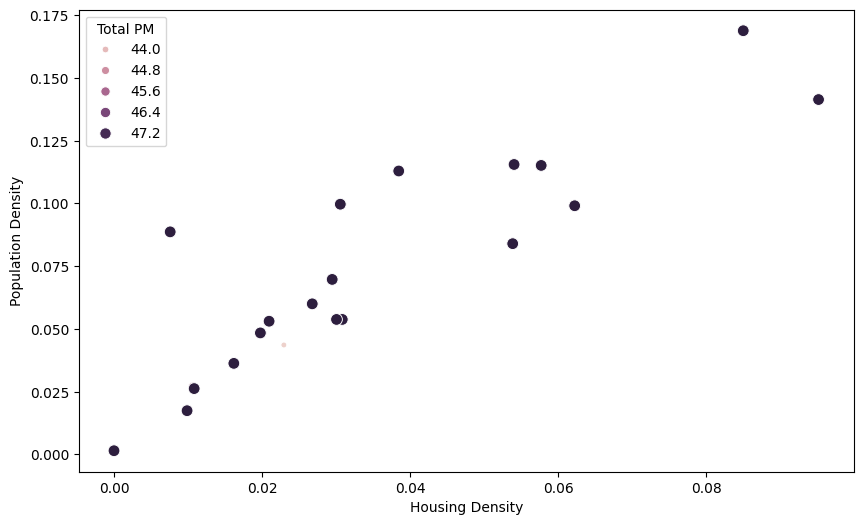

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

newdf['Total PM'] = newdf['AQI_PM2.5'] + newdf['AQI_PM10']

metric = 'Total PM'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=newdf, x='Housing Density', y='Population Density', hue=metric, size=metric)
plt.show()

In [2]:
import pandas as pd

df = pd.read_csv('Climate_Ready_Boston_Social_Vulnerability.csv')

df = df.groupby('Name').sum()

df_sum = pd.read_csv('../Merged Data/result.csv')
df_air = df_sum[['Name', 'AQI_PM2.5']]

merged_data = pd.merge(df, df_air, on='Name', how='inner')
merged_data.head()
newdf = merged_data[['Name', 'TotDis', 'TotChild', 'OlderAdult', 'Low_to_No' ,'LEP', 'POC2', 'MedIllnes', 'AQI_PM2.5']]
newdf.head()

,Name,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,AQI_PM2.5
0,Allston,400,173,144,3300,3444,3011,2831.85,33.431573
1,Back Bay,1892,1686,3759,5316,9075,6923,11842.96,33.431573
2,Bay Village,1122,1249,1711,3929,5640,6008,4292.93,33.431573
3,Brighton,5502,4244,5847,17067,22914,19768,23936.80,33.431573
4,Charlestown,1535,3301,1811,4157,5968,3981,6461.47,29.433603


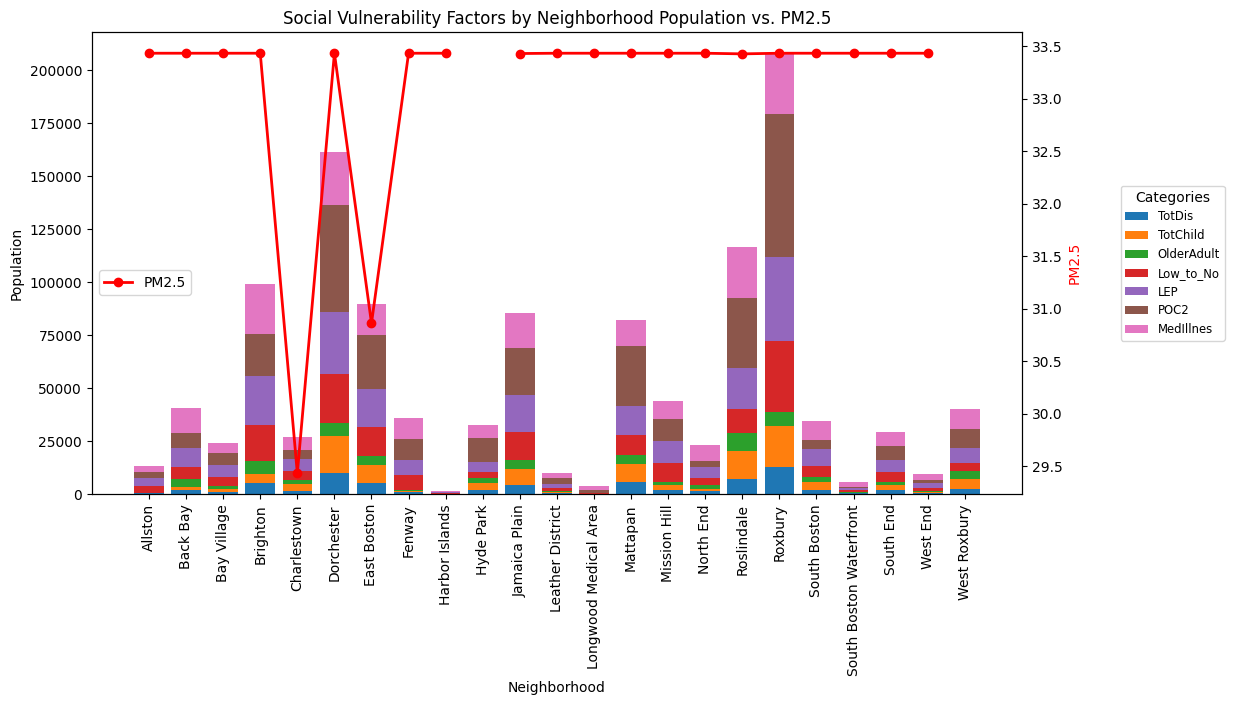

,Name,Population,AQI_PM2.5,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes
0,Allston,13303.85,33.431573,400,173,144,3300,3444,3011,2831.85
1,Back Bay,40493.96,33.431573,1892,1686,3759,5316,9075,6923,11842.96
2,Bay Village,23951.93,33.431573,1122,1249,1711,3929,5640,6008,4292.93
3,Brighton,99278.80,33.431573,5502,4244,5847,17067,22914,19768,23936.80
4,Charlestown,27214.47,29.433603,1535,3301,1811,4157,5968,3981,6461.47
5,Dorchester,161599.76,33.431573,9819,17424,6535,22749,29284,50778,25010.76
6,East Boston,89818.60,30.861449,5180,8665,4147,13698,17845,25459,14824.60
7,Fenway,35935.74,33.431573,1240,453,496,6681,7177,9808,10080.74
8,Harbor Islands,1501.53,33.431573,179,0,12,349,361,370,230.53
9,Hyde Park,32721.46,NaN,2117,3256,2219,2683,4902,11132,6412.46


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


data = newdf.copy()

data['Population'] = data['TotDis'] + data['TotChild'] + data['OlderAdult'] + data['Low_to_No'] + data['LEP'] + data['POC2'] + data['MedIllnes']
stacked_columns = ['TotDis', 'TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2', 'MedIllnes']

selected_columns = data[['Name', 'Population', 'AQI_PM2.5'] + stacked_columns]
stacked_columns = ['TotDis', 'TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2', 'MedIllnes']

fig, ax1 = plt.subplots(figsize=(12, 6))

bottom = 0
legend_labels = []

for column in stacked_columns:
    ax1.bar(data['Name'], data[column], bottom=bottom, label=column)
    bottom += data[column]
    legend_labels.append(column)

ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Population')
ax1.set_title('Social Vulnerability Factors by Neighborhood Population vs. PM2.5')
ax1.set_xticks(data['Name'])
ax1.set_xticklabels(data['Name'], rotation=90)

ax1.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1.1, 0.5), fontsize='small')

ax2 = ax1.twinx()
ppi_data = data['AQI_PM2.5']
ax2.plot(data['Name'], ppi_data, marker='o', color='red', label='PM2.5', linewidth=2)
ax2.set_ylabel('PM2.5', color='red')

ax2.legend(['PM2.5'], loc="upper left", bbox_to_anchor=(0, 0.5))

plt.show()

selected_columns.head(10)
